In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_csv('data/Stud.csv')


In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.shape

(1000, 8)

Data Checks to perform
Check Missing values
Check Duplicates
Check data type
Check the number of unique values of each column
Check statistics of data set
Check various categories present in the different categorical column

In [17]:
#Check Missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
##Check Duplicates
df.duplicated().sum()

0

In [20]:
##Check data type
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [21]:
#Check the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [22]:
#Check statistics of data set
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
#Check various categories present in the different categorical column


In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
print("Gender has {0} variables and variables are {1}".format(len(df['gender'].unique()),df['gender'].unique()))
print("-----------------------------------------------------------------------------------------------------")
print("race/ethnicity has {0} variables and variables are {1}".format(len(df['race/ethnicity'].unique()),df['race/ethnicity'].unique()))
print("-----------------------------------------------------------------------------------------------------")
print("parental level of education has {0} variables and variables are {1}".format(len(df['parental level of education'].unique()),df['parental level of education'].unique()))
print("-----------------------------------------------------------------------------------------------------")
print("lunch has {0} variables and variables are {1}".format(len(df['lunch'].unique()),df['lunch'].unique()))
print("-----------------------------------------------------------------------------------------------------")
print("test preparation course has {0} variables and variables are {1}".format(len(df['test preparation course'].unique()),df['test preparation course'].unique()))

Gender has 2 variables and variables are ['female' 'male']
-----------------------------------------------------------------------------------------------------
race/ethnicity has 5 variables and variables are ['group B' 'group C' 'group A' 'group D' 'group E']
-----------------------------------------------------------------------------------------------------
parental level of education has 6 variables and variables are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-----------------------------------------------------------------------------------------------------
lunch has 2 variables and variables are ['standard' 'free/reduced']
-----------------------------------------------------------------------------------------------------
test preparation course has 2 variables and variables are ['none' 'completed']


In [39]:
# define numerical & categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O' ]
categorial_features=[feature for feature in df.columns if df[feature].dtype == 'O' ]

In [41]:
print(numerical_features)
print(categorial_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [45]:
df['total']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['total']/3

SyntaxError: invalid decimal literal (1407242710.py, line 2)

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [48]:
df['Average']=df['Average'].apply(lambda x:f"{x:.2f}")

In [49]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [56]:
reading_full=df[df['reading score']==100]['Average'].count()
writing_full=df[df['writing score']==100]['Average'].count()
math_full=df[df['math score']==100]['Average'].count()

In [58]:
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
math_less_20 = df[df['math score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


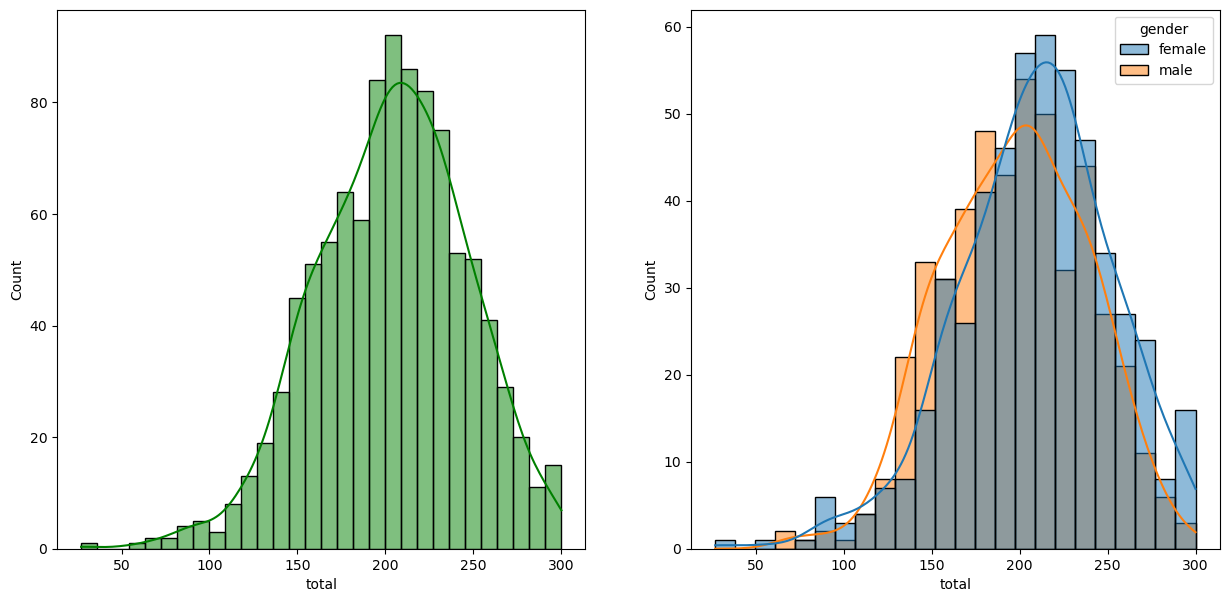

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total',kde=True,hue='gender')
plt.show()

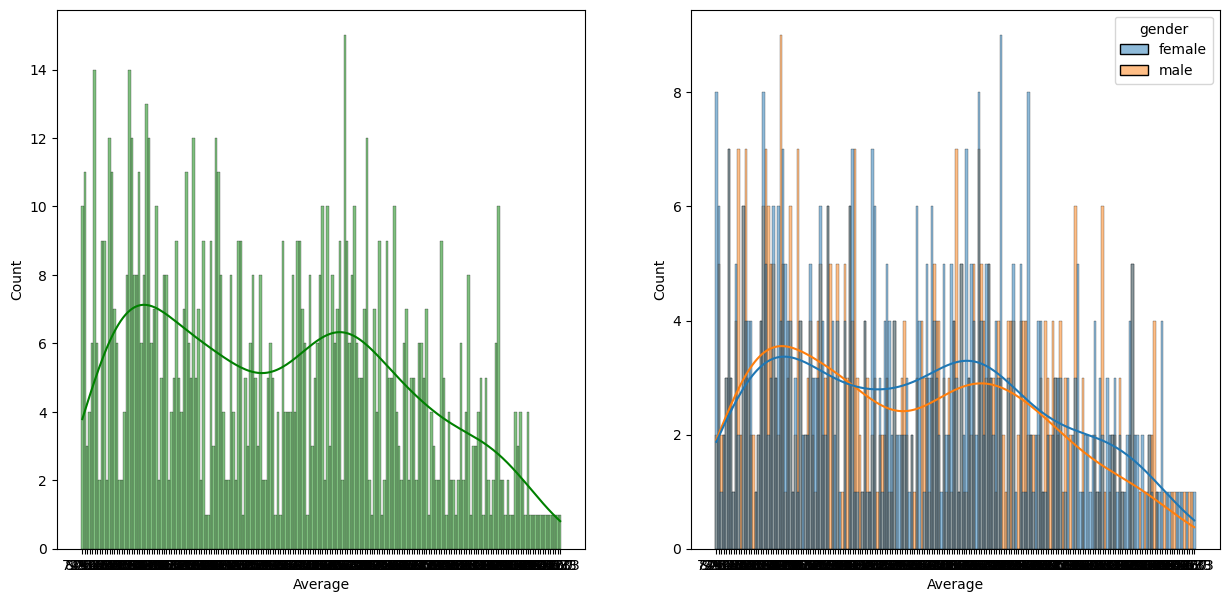

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=50,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()